In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
best_style = {
    "font.family": "sans-serif",
    "mathtext.fontset": "custom",
    "mathtext.rm": "TeX Gyre Heros",
    "mathtext.bf": "TeX Gyre Heros:bold",
    "mathtext.sf": "TeX Gyre Heros",
    "mathtext.it": "TeX Gyre Heros:italic",
    "mathtext.tt": "TeX Gyre Heros",
    "mathtext.cal": "TeX Gyre Heros",
    "mathtext.default": "regular",
    "figure.figsize": (10.0, 10.0),
    "font.size": 26,
    "axes.labelsize": "medium",
    "axes.unicode_minus": False,
    "xtick.labelsize": "small",
    "ytick.labelsize": "small",
    "legend.fontsize": "small",
    "legend.handlelength": 1.5,
    "legend.borderpad": 0.5,
    "xtick.direction": "in",
    "xtick.major.size": 12,
    "xtick.minor.size": 6,
    "xtick.major.pad": 6,
    "xtick.top": True,
    "xtick.major.top": True,
    "xtick.major.bottom": True,
    "xtick.minor.top": True,
    "xtick.minor.bottom": True,
    "xtick.minor.visible": True,
    "ytick.direction": "in",
    "ytick.major.size": 12,
    "ytick.minor.size": 6.0,
    "ytick.right": True,
    "ytick.major.left": True,
    "ytick.major.right": True,
    "ytick.minor.left": True,
    "ytick.minor.right": True,
    "ytick.minor.visible": True,
    "grid.alpha": 0.8,
    "grid.linestyle": ":",
    "axes.linewidth": 2,
    "savefig.transparent": False,
}
plt.style.use(best_style)
cols = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cols)

In [4]:
# Functions to read MCMC and analytical posteriors

def read_mcmc_samples(filename):
    file = np.load(filename)
    flat_samples = file['flat_samples']
    mean_samples = np.mean(flat_samples, axis=0)
    std_samples = np.std(flat_samples, axis=0)
    return flat_samples, mean_samples, std_samples
    
def read_analytic_samples(filename):
    file = np.load(filename)
    posterior_all_samples = file['samples']
    posteriors_all = file['stats']
    return posterior_all_samples, posteriors_all

def read_logr(filename):
    file = np.load(filename)
    llr = file['logr']
    return llr

In [5]:
# w = -1
_, mean_samples11, std_samples11 = read_mcmc_samples('mcmc_posterior-1_'+str(5)+'_v2.npz')
_, mean_samples21, std_samples21 = read_mcmc_samples('mcmc_posterior-1_'+str(100)+'_v2.npz')
flat_samples31, mean_samples31, std_samples31 = read_mcmc_samples('mcmc_posterior-1_'+str(500)+'_v2.npz')
flat_samples41, mean_samples41, std_samples41 = read_mcmc_samples('mcmc_posterior-1_'+str(1000)+'_v2.npz')
flat_samples51, mean_samples51, std_samples51 = read_mcmc_samples('mcmc_posterior-1_'+str(2000)+'_v2.npz')
flat_samples61, mean_samples61, std_samples61 = read_mcmc_samples('mcmc_posterior-1_'+str(3000)+'_v2.npz')

# w = -0.8
_,mean_samples12, std_samples12 = read_mcmc_samples('mcmc_posterior-08_'+str(5)+'.npz')
_, mean_samples22, std_samples22 = read_mcmc_samples('mcmc_posterior-08_'+str(100)+'.npz')
flat_samples32, mean_samples32, std_samples32 = read_mcmc_samples('mcmc_posterior-08_'+str(500)+'.npz')
flat_samples42, mean_samples42, std_samples42 = read_mcmc_samples('mcmc_posterior-08_'+str(1000)+'.npz')
flat_samples52, mean_samples52, std_samples52 = read_mcmc_samples('mcmc_posterior-08_'+str(2000)+'.npz')
flat_samples62, mean_samples62, std_samples62 = read_mcmc_samples('mcmc_posterior-08_'+str(3000)+'.npz')

# w = -1.2
_, mean_samples13, std_samples13 = read_mcmc_samples('mcmc_posterior-12_'+str(5)+'_v2.npz')
_, mean_samples23, std_samples23 = read_mcmc_samples('mcmc_posterior-12_'+str(100)+'_v2.npz')
flat_samples33, mean_samples33, std_samples33 = read_mcmc_samples('mcmc_posterior-12_'+str(500)+'_v2.npz')
flat_samples43, mean_samples43, std_samples43 = read_mcmc_samples('mcmc_posterior-12_'+str(1000)+'_v2.npz')
flat_samples53, mean_samples53, std_samples53 = read_mcmc_samples('mcmc_posterior-12_'+str(2000)+'_v2.npz')
flat_samples63, mean_samples63, std_samples63 = read_mcmc_samples('mcmc_posterior-12_'+str(3000)+'_v2.npz')

In [6]:
posterior_all_samples1, posteriors_all1 = read_analytic_samples('analytical_posteriors_w-1_v3.npz')
posterior_all_samples2, posteriors_all2 = read_analytic_samples('analytical_posteriors_w-08_v3.npz')
posterior_all_samples3, posteriors_all3 = read_analytic_samples('analytical_posteriors_w-12_v3.npz')

### Plot the mean and std of MCMC and Analytical posteriors 

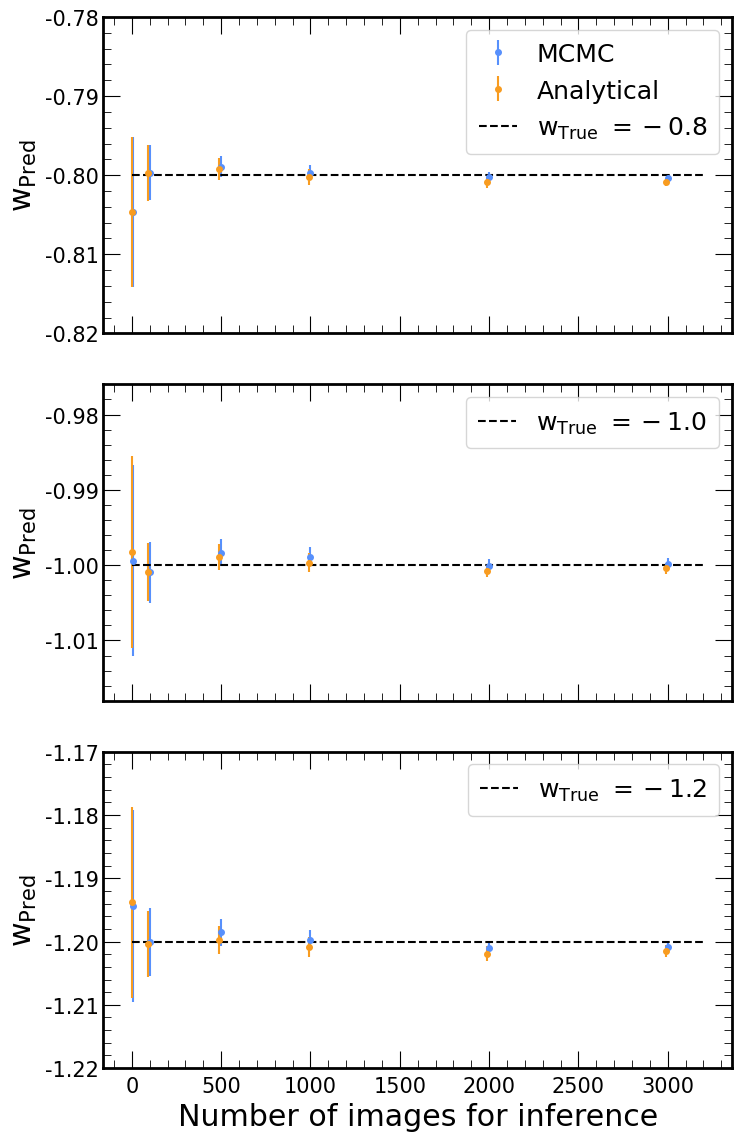

In [48]:
num_images_mcmc = [5, 100, 500, 1000, 2000, 3000]
num_images_analytic = np.array([0, 90, 490, 990, 1990, 2990])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 12))

# First panel
ax2.errorbar(num_images_mcmc, 
             [mean_samples11[0], mean_samples21[0], mean_samples31[0], 
              mean_samples41[0], mean_samples51[0], mean_samples61[0]], 
             yerr=[std_samples11[0], std_samples21[0], std_samples31[0], 
                   std_samples41[0], std_samples51[0], std_samples61[0]],
              markersize=4, fmt='o')
ax2.errorbar(num_images_analytic, posteriors_all1[:,0], 
             yerr=posteriors_all1[:,1], markersize=4, fmt='o')
ax2.plot([0, 3200], [-1.0, -1.0], ls='--', color='k', label=r'$w_{True}\ = -1.0$')

ax2.set_ylabel(r'$w_{Pred}$', fontsize='small')
# ax2.set_ylim([-1.015, -0.945])
ax2.set_ylim([-1.018, -0.976])
ax2.legend(loc='upper right', fontsize='x-small')
ax2.tick_params(axis='both', which='both', labelsize='xx-small')
# ax1.legend(loc='upper left', bbox_to_anchor=(0.6,0.8))

# Second panel
ax1.errorbar(num_images_mcmc, 
             [mean_samples12[0], mean_samples22[0], mean_samples32[0], 
              mean_samples42[0], mean_samples52[0], mean_samples62[0]], 
             yerr=[std_samples12[0], std_samples22[0], std_samples32[0], 
                   std_samples42[0], std_samples52[0], std_samples62[0]],
             markersize=4, fmt='o', label='MCMC')
ax1.errorbar(num_images_analytic, posteriors_all2[:,0], 
             yerr=posteriors_all2[:,1],markersize=4, fmt='o',label='Analytical')
line1, = ax1.plot([0, 3200], [-0.8, -0.8], ls='--', color='k', label=r'$w_{True}\ = -0.8$')
# ax1.set_ylim([-0.813, -0.781])
ax1.set_ylim([-0.82, -0.78])
ax1.set_ylabel(r'$w_{Pred}$', fontsize='small')
ax1.tick_params(axis='both', which='both', labelsize='xx-small')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[handles[1], handles[2], line1], loc='upper right', fontsize='x-small')


# Third panel
ax3.errorbar(num_images_mcmc, 
             [mean_samples13[0], mean_samples23[0], mean_samples33[0], 
              mean_samples43[0], mean_samples53[0], mean_samples63[0]], 
             yerr=[std_samples13[0], std_samples23[0], std_samples33[0], 
                   std_samples43[0], std_samples53[0], std_samples63[0]],
             markersize=4, fmt='o')
ax3.errorbar(num_images_analytic, posteriors_all3[:,0], 
             yerr=posteriors_all3[:,1],markersize=4, fmt='o')
ax3.plot([0, 3200], [-1.2, -1.2], ls='--', color='k', label=r'$w_{True}\ = -1.2$')
# ax3.set_ylim([-1.22, -1.17])
ax3.set_ylim([-1.22, -1.17])
ax3.set_xlabel('Number of images for inference', fontsize='small')
ax3.set_ylabel(r'$w_{Pred}$', fontsize='small')
ax3.legend(loc='upper right', fontsize='x-small')
ax3.tick_params(axis='both', which='both', labelsize='xx-small')

plt.subplots_adjust(hspace=0)  # No space between plots
plt.tight_layout()
plt.savefig("MCMC_analytical_posterior_all.pdf")
plt.show()

### Plot the MCMC and analytical posteriors 

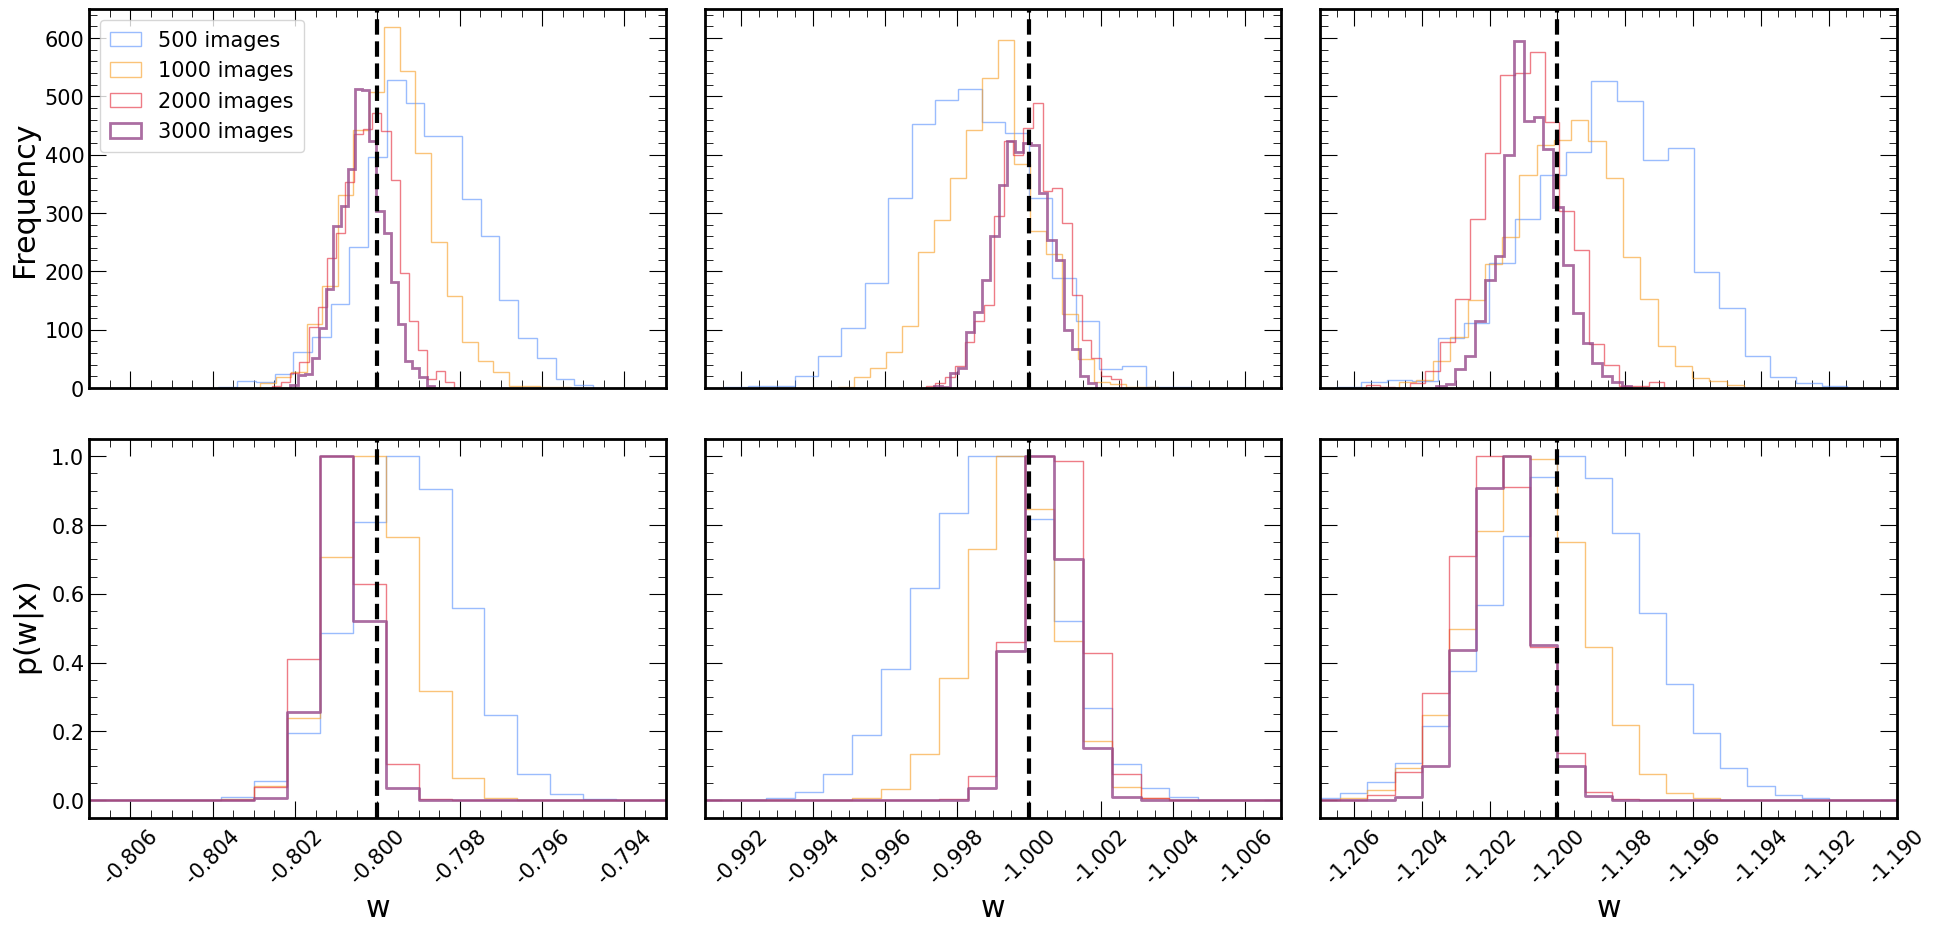

In [47]:
import matplotlib.pyplot as plt

mean_theta = 0.0
std_theta = 1.0

sample_theta_unstd = np.linspace(-2.0, -0.4, 2000)
sample_theta = (sample_theta_unstd - mean_theta)/std_theta

# Create a 2x3 subplot grid with shared X and Y axes
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex='col', sharey='row')

# MCMC posterior
# Plot histograms in the first row
axes[0, 0].hist(flat_samples32, bins=20, label='500 images', alpha=0.6, histtype='step', lw=1)
axes[0, 0].hist(flat_samples42, bins=20, label='1000 images', alpha=0.6, histtype='step', lw=1)
axes[0, 0].hist(flat_samples52, bins=20, label='2000 images', alpha=0.6, histtype='step', lw=1)
axes[0, 0].hist(flat_samples62, bins=20, label='3000 images', alpha=0.8, histtype='step', lw=2)
axes[0, 0].axvline(-0.8, linestyle='--', color='k', lw=3)
axes[0, 0].set_ylabel('Frequency', fontsize='small')
axes[0, 0].legend(fontsize='xx-small')
axes[0, 0].tick_params(axis='both', which='both', labelsize='xx-small')

axes[0, 1].hist(flat_samples31, bins=20, label='500 images', alpha=0.6, histtype='step', lw=1)
axes[0, 1].hist(flat_samples41, bins=20, label='1000 images', alpha=0.6, histtype='step', lw=1)
axes[0, 1].hist(flat_samples51, bins=20, label='2000 images', alpha=0.6, histtype='step', lw=1)
axes[0, 1].hist(flat_samples61, bins=20, label='3000 images', alpha=0.8, histtype='step', lw=2)
axes[0, 1].axvline(-1, linestyle='--', color='k', lw=3)
axes[0, 1].tick_params(axis='both', which='both', labelsize='xx-small')
# axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(flat_samples33, bins=20, label='500 images', alpha=0.6, histtype='step', lw=1)
axes[0, 2].hist(flat_samples43, bins=20, label='1000 images', alpha=0.6, histtype='step', lw=1)
axes[0, 2].hist(flat_samples53, bins=20, label='2000 images', alpha=0.6, histtype='step', lw=1)
axes[0, 2].hist(flat_samples63, bins=20, label='3000 images', alpha=0.8, histtype='step', lw=2)
axes[0, 2].axvline(-1.2, linestyle='--', color='k', lw=3)
axes[0, 2].tick_params(axis='both', which='both', labelsize='xx-small')
# axes[0, 2].set_xlabel(r'$w$')
# axes[0, 2].set_ylabel('Frequency')

# Analytical posterior
# Plot analytical posteriors in the second row
num_images = [5, 100, 500, 1000, 2000, 3000]
for i, pos in enumerate(posterior_all_samples2[2:]):
    true_w = -0.8
    if i != 3:
        axes[1, 0].plot(sample_theta, pos / np.max(pos), label=str(num_images[i + 2]) + ' images', 
                    drawstyle='steps-mid', alpha=0.6, lw=1)
    if i == 3:
        axes[1, 0].plot(sample_theta, pos / np.max(pos), label=str(num_images[i + 2]) + ' images', 
                        drawstyle='steps-mid', alpha=0.8, lw=2)
        
axes[1, 0].set_xlabel(r'$w$', fontsize='small')
axes[1, 0].set_ylabel(r'$p(w | x)$', fontsize='small')
axes[1, 0].set_xlim(-0.807, -0.793)
axes[1, 0].axvline(-0.8, linestyle='--', color='k', lw=3)
axes[1, 0].tick_params(axis='both', which='both', labelsize='xx-small')

for i, pos in enumerate(posterior_all_samples1[2:]):
    true_w = -1.0
    if i != 3:
        axes[1, 1].plot(sample_theta, pos / np.max(pos), label=str(num_images[i + 2]) + ' images', 
                    drawstyle='steps-mid', alpha=0.6, lw=1)
    if i == 3:
        axes[1, 1].plot(sample_theta, pos / np.max(pos), label=str(num_images[i + 2]) + ' images', 
                        drawstyle='steps-mid', alpha=0.8, lw=2)
axes[1, 1].set_xlabel(r'$w$', fontsize='small')
axes[1, 1].axvline(-1.0, linestyle='--', color='k', lw=3)
axes[1, 1].set_xlim(-0.991, -1.007)
axes[1,1].tick_params(axis='both', which='both', labelsize='xx-small')


for i, pos in enumerate(posterior_all_samples3[2:]):
    true_w = -1.2
    if i != 3:
        axes[1, 2].plot(sample_theta, pos / np.max(pos), label=str(num_images[i + 2]) + ' images', 
                    drawstyle='steps-mid', alpha=0.6, lw=1)
    if i == 3:
        axes[1, 2].plot(sample_theta, pos / np.max(pos), label=str(num_images[i + 2]) + ' images', 
                        drawstyle='steps-mid', alpha=0.8, lw=2)
axes[1, 2].set_xlabel(r'$w$', fontsize='small')
axes[1, 2].set_xlim(-1.207, -1.19)
axes[1, 2].axvline(-1.2, linestyle='--', color='k', lw=3)
axes[1,2].tick_params(axis='both', which='both', labelsize='xx-small')

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45)


plt.subplots_adjust(hspace=0.03, wspace=0.03)
plt.tight_layout()
plt.savefig('MCMC_analytical_posterior_probability.pdf')
plt.show()
